In [1]:
import pandas as pd
import numpy as np
# Estaqblecer la visualizacion de todas las columnas
pd.set_option('display.max_columns', None)

# Establecer el formato para números de punto flotante
pd.options.display.float_format = lambda x: '%.4f' % x

# Paquetes d visualización
import seaborn as sns
import matplotlib.pyplot as plt 

import sys
sys.path.append('..')
from src import soporte_analisis as spa
from src import sp_visualizacin as spv
from src import sp_eda as spe
from src import sp_nulos as spn

# Librería de gstion de nulos, predictiva
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [2]:
df=pd.read_csv('../data/col_numericas_outliers.csv', parse_dates=['date'])

In [3]:
spe.calcular_porcentaje_nulos(df.select_dtypes(include=np.number))


campaign_id         0.0000
duration            8.8600
conversion_rate     4.5000
roi                17.3800
clicks             14.9000
impressions        10.2200
engagement_score   11.3700
total($)            3.8500
year                3.2900
month               3.2900
quarter             3.2900
dtype: float64

In [4]:
col_hight_umbral, col_low_umbral= spn.gestion_nulos(df.select_dtypes(include=np.number), 5)

,Column,Datatype,NullCount,Null%
0,duration,float64,18606,8.8636
1,conversion_rate,float64,9444,4.4990
2,roi,float64,36476,17.3766
3,clicks,float64,31274,14.8984
4,impressions,float64,21462,10.2241
5,engagement_score,float64,23864,11.3684
6,total($),float64,8083,3.8506
7,year,float64,6908,3.2909
8,month,float64,6908,3.2909
9,quarter,float64,6908,3.2909


Columnas numericas relacionadas con fecha

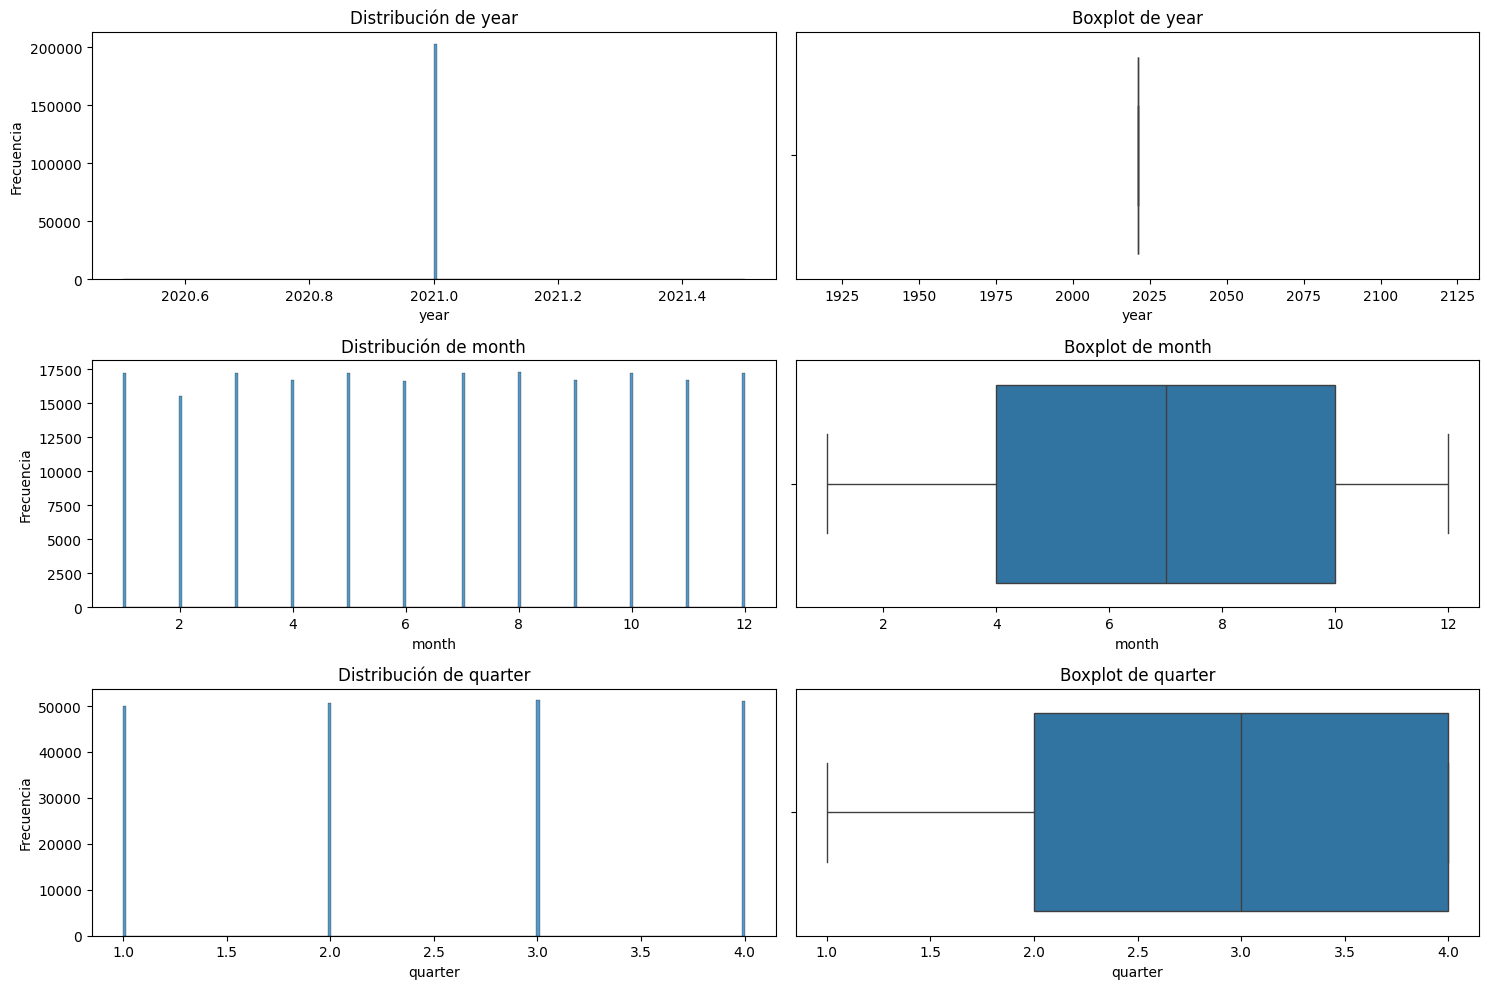

In [5]:
lista_col_fecha= ['year', 'month', 'quarter']
spv.subplot_col_num(df, lista_col_fecha)

In [6]:
df[lista_col_fecha].describe().T

,count,mean,std,min,25%,50%,75%,max
year,203007.0000,2021.0000,0.0000,2021.0000,2021.0000,2021.0000,2021.0000,2021.0000
month,203007.0000,6.5275,3.4465,1.0000,4.0000,7.0000,10.0000,12.0000
quarter,203007.0000,2.5101,1.1162,1.0000,2.0000,3.0000,4.0000,4.0000


In [7]:
col_low_umbral

['conversion_rate', 'total($)', 'year', 'month', 'quarter']

In [8]:
df_filled_simple= df.fillna({
  'conversion_rate': df['conversion_rate'].mean(),
  'total($)': df['total($)'].mean(),
  'year': 2021,
  'month': df['month'].median(),
  'quarter': 3
  
})

In [9]:
spn.gestion_nulos(df_filled_simple[col_low_umbral])

,Column,Datatype,NullCount,Null%


([], [])

In [10]:
df[col_low_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
conversion_rate,200471.0000,0.0808,0.0410,0.0100,0.0500,0.0808,0.1200,0.1515
total($),201832.0000,12503.9995,4338.1943,5000.0000,8740.0000,12496.0000,16261.0000,20000.0000
year,203007.0000,2021.0000,0.0000,2021.0000,2021.0000,2021.0000,2021.0000,2021.0000
month,203007.0000,6.5275,3.4465,1.0000,4.0000,7.0000,10.0000,12.0000
quarter,203007.0000,2.5101,1.1162,1.0000,2.0000,3.0000,4.0000,4.0000


Comparamos los estadisticos tras la sustitucion de los nulos para ver si hemos tomado buenas decisiones,

como no hay cambios relevantes en los datos procedemos a cambiarlo en el df original con el que estoy trabajando

In [11]:
df= df.fillna({
  'conversion_rate': df['conversion_rate'].mean(),
  'total($)': df['total($)'].mean(),
  'year': 2021,
  'month': df['month'].median(),
  'quarter': 3
  
})

# Gestión de nulos con umbral mayor q 5 con IterativaImputer


In [22]:
def comparativa_metodos_nulos_numericos ( df, lista_columnas):
  iter_imputer= IterativeImputer(max_iter=50, random_state=42)
  data_imputer= iter_imputer.fit_transform(df[lista_columnas])
  new_col= [col + '_iterative' for col in lista_columnas]
  df[new_col]= data_imputer
  imputer_knn= KNNImputer(n_neighbors=5)
  imputer_knn_imputado = imputer_knn.fit_transform(df[lista_columnas])
  col_knn_imputer= [col + '_knn' for col in lista_columnas]
  df[col_knn_imputer]= imputer_knn_imputado
  col_imputados= lista_columnas + col_knn_imputer + new_col
  display (df, col_imputados)
  return df

In [24]:
comparativa_metodos_nulos_numericos(df, col_hight_umbral)

,campaign_id,company,campaign_type,duration,channel_used,conversion_rate,roi,location,language,clicks,impressions,engagement_score,customer_segment,date,total($),genre,ages,year,month,day_name,quarter,duration_iterative,roi_iterative,clicks_iterative,impressions_iterative,engagement_score_iterative,duration_knn,roi_knn,clicks_knn,impressions_knn,engagement_score_knn
0,1,innovate industries,unknow,30.0000,google ads,0.0404,6.2900,chicago,spanish,NaN,19221922.0000,66.0000,health & wellness,2021-01-01,16174.0000,men,18-24,2021.0000,1.0000,friday,1.0000,30.0000,6.2900,274896.0433,19221922.0000,66.0000,30.0000,6.2900,267276.2000,19221922.0000,66.0000
1,2,nexgen systems,email,60.0000,google ads,0.1212,5.6100,new york,german,116.0000,7523.0000,7.0000,fashionistas,2021-01-02,11566.0000,women,35-44,2021.0000,1.0000,saturday,1.0000,60.0000,5.6100,116.0000,7523.0000,7.0000,60.0000,5.6100,116.0000,7523.0000,7.0000
2,3,alpha innovations,influencer,30.0000,youtube,0.0707,7.1800,los angeles,french,NaN,7698.0000,11.0000,outdoor adventurers,2021-01-03,10200.0000,men,25-34,2021.0000,1.0000,sunday,1.0000,30.0000,7.1800,274462.5242,7698.0000,11.0000,30.0000,7.1800,193442.4000,7698.0000,11.0000
3,4,unknow,display,60.0000,youtube,0.1111,NaN,miami,mandarin,217.0000,NaN,7.0000,health & wellness,2021-01-04,12724.0000,unknow,all_ages,2021.0000,1.0000,monday,1.0000,60.0000,27.7217,217.0000,27541008.2197,7.0000,60.0000,27.0926,217.0000,57782200.6000,7.0000
4,5,nexgen systems,email,15.0000,youtube,0.0505,66.5500,los angeles,unknow,379379.0000,4201.0000,33.0000,health & wellness,2021-01-05,16452.0000,men,25-34,2021.0000,1.0000,tuesday,1.0000,15.0000,66.5500,379379.0000,4201.0000,33.0000,15.0000,66.5500,379379.0000,4201.0000,33.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209910,105984,alpha innovations,email,30.0000,youtube,0.0202,44.4747,chicago,spanish,NaN,79087908.0000,77.0000,outdoor adventurers,2021-05-14,9180.0000,men,18-24,2021.0000,5.0000,friday,2.0000,30.0000,44.4747,276246.7641,79087908.0000,77.0000,30.0000,44.4747,480.8000,79087908.0000,77.0000
209911,186903,datatech solutions,social media,60.0000,website,0.0700,5.0500,los angeles,unknow,834834.0000,1774.0000,99.0000,foodies,2021-01-23,6382.0000,women,25-34,2021.0000,1.0000,saturday,1.0000,60.0000,5.0500,834834.0000,1774.0000,99.0000,60.0000,5.0500,834834.0000,1774.0000,99.0000
209912,28288,techcorp,display,60.0000,unknow,0.0303,6.3400,miami,mandarin,314314.0000,61466146.0000,44.0000,fashionistas,2021-07-02,18155.0000,men,18-24,2021.0000,7.0000,friday,3.0000,60.0000,6.3400,314314.0000,61466146.0000,44.0000,60.0000,6.3400,314314.0000,61466146.0000,44.0000
209913,39333,innovate industries,display,15.0000,google ads,0.0505,33.4747,chicago,german,457457.0000,NaN,11.0000,health & wellness,2021-10-05,15166.0000,women,25-34,2021.0000,10.0000,tuesday,4.0000,15.0000,33.4747,457457.0000,27542853.0044,11.0000,15.0000,33.4747,457457.0000,23602728.8000,11.0000


['duration',
 'roi',
 'clicks',
 'impressions',
 'engagement_score',
 'duration_knn',
 'roi_knn',
 'clicks_knn',
 'impressions_knn',
 'engagement_score_knn',
 'duration_iterative',
 'roi_iterative',
 'clicks_iterative',
 'impressions_iterative',
 'engagement_score_iterative']

In [25]:
col_imputados =['duration',
 'roi',
 'clicks',
 'impressions',
 'engagement_score',
 'duration_knn',
 'roi_knn',
 'clicks_knn',
 'impressions_knn',
 'engagement_score_knn',
 'duration_iterative',
 'roi_iterative',
 'clicks_iterative',
 'impressions_iterative',
 'engagement_score_iterative']

In [27]:
df[col_imputados].describe().sort_index(axis=1).T

,count,mean,std,min,25%,50%,75%,max
clicks,178641.0000,275083.8650,330318.3401,100.0000,551.0000,100100.0000,548548.0000,999999.0000
clicks_iterative,209915.0000,275083.7669,304720.3894,100.0000,630.0000,256256.0000,470470.0000,999999.0000
clicks_knn,209915.0000,273915.1091,309861.7437,100.0000,623.0000,171171.0000,493217.0000,999999.0000
duration,191309.0000,37.5035,16.7443,15.0000,30.0000,30.0000,45.0000,60.0000
duration_iterative,209915.0000,37.5035,15.9850,15.0000,30.0000,37.5220,45.0000,60.0000
duration_knn,209915.0000,37.4795,16.1404,15.0000,30.0000,36.0000,45.0000,60.0000
engagement_score,186051.0000,77.9064,215.8253,1.0000,5.0000,10.0000,66.0000,1010.0000
engagement_score_iterative,209915.0000,77.9071,203.1876,1.0000,6.0000,22.0000,77.0000,1010.0000
engagement_score_knn,209915.0000,78.7581,206.1326,1.0000,6.0000,14.0000,66.0000,1010.0000
impressions,188453.0000,27542118.3142,33097499.8431,1000.0000,5508.0000,9996.0000,55225522.0000,99999999.0000


In [28]:
df.drop(['duration_iterative',
 'roi_iterative',
 'clicks_iterative',
 'impressions_iterative',
 'engagement_score_iterative','duration',
 'roi',
 'clicks',
 'impressions',
 'engagement_score'], axis=1, inplace=True)

In [29]:
df.to_csv('../data/nulos_numericas_limpios.csv', index=False)